In [2]:
# Examples are given for numpy. This code also setups ipython/jupyter
# so that numpy arrays in the output are displayed as images
import numpy
# from utils import display_np_arrays_as_images

# display_np_arrays_as_images()


import numpy as np
from IPython import get_ipython
from IPython.display import display_html
from PIL.Image import fromarray
from einops import rearrange, reduce, repeat

In [3]:



def display_np_arrays_as_images():
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return fromarray(np.array(np.clip(a, 0, 1) * 255, dtype="uint8"))._repr_png_()
        else:
            return fromarray(np.zeros([1, 1], dtype="uint8"))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print(f"<array of shape {obj.shape}>")

    get_ipython().display_formatter.formatters["image/png"].for_type(np.ndarray, np_to_png)
    get_ipython().display_formatter.formatters["text/plain"].for_type(np.ndarray, np_to_text)


_style_inline = """<style>
.einops-answer {
    color: transparent;
    padding: 5px 15px;
    background-color: #def;
}
.einops-answer:hover { color: blue; }
</style>
"""


def guess(x):
    display_html(
        _style_inline + f"<h4>Answer is: <span class='einops-answer'>{tuple(x)}</span> (hover to see)</h4>",
        raw=True,
    )

In [48]:
!wget https://github.com/arogozhnikov/einops/blob/5dac4043970e0a74c81fcc5a73d7386ca696113e/docs/resources/test_images.npy ./

--2025-05-06 18:23:14--  https://github.com/arogozhnikov/einops/blob/5dac4043970e0a74c81fcc5a73d7386ca696113e/docs/resources/test_images.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘test_images.npy.1’

test_images.npy.1       [ <=>                ] 173.71K  --.-KB/s    in 0.03s   

2025-05-06 18:23:14 (5.25 MB/s) - ‘test_images.npy.1’ saved [177884]

--2025-05-06 18:23:14--  http://./
Resolving . (.)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘.’
FINISHED --2025-05-06 18:23:14--
Total wall clock time: 0.9s
Downloaded: 1 files, 174K in 0.03s (5.25 MB/s)


In [49]:
ims = numpy.load("./test_images.npy", allow_pickle=True)

In [50]:
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


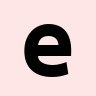

In [51]:
display_np_arrays_as_images()
ims[0]


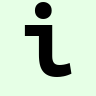

In [52]:
ims[1]

In [53]:
ims.shape

(6, 96, 96, 3)

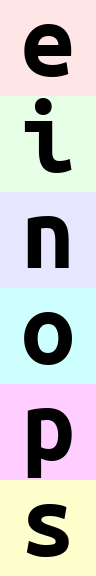

In [54]:


rearrange(ims, "b h w c -> (b h) w c")

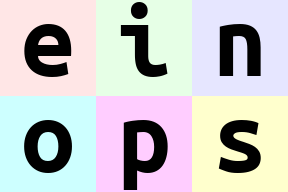

In [16]:
# finally, combine composition and decomposition:
rearrange(ims, "(b1 b2) h w c -> (b1 h) (b2 w) c ", b1=2)

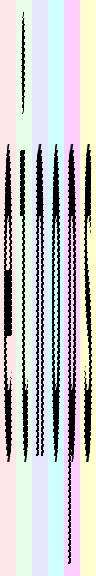

In [27]:
# move part of width dimension to height.
# we should call this width-to-height as image width shrunk by 2 and height doubled.
# but all pixels are the same!
# Can you write reverse operation (height-to-width)?
rearrange(ims, "b h (w w2) c -> (h w2) (b w) c", w2=6)

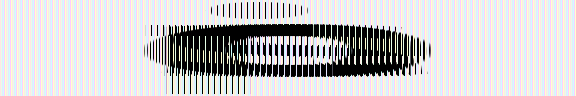

In [28]:
rearrange(ims, "b h w c -> h (w b) c")

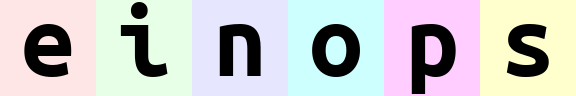

In [29]:
rearrange(ims, "b h w c -> h (b w) c")

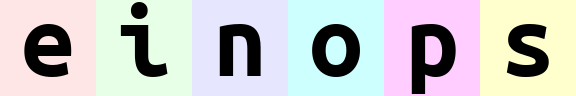

In [34]:
# what if b1 and b2 are reordered before composing to width?
rearrange(ims, "(b1 b2) h w c -> h (b1 b2 w) c ", b1=2)  # produces 'einops'


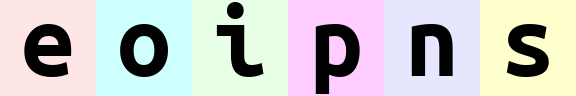

In [33]:
rearrange(ims, "(b1 b2) h w c -> h (b2 b1 w) c ", b1=2)  # produces 'eoipns'

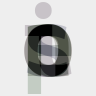

In [36]:
reduce(ims, "b h w c -> h w c", "mean")


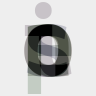

In [37]:
# the previous is identical to familiar:
ims.mean(axis=0)
# but is so much more readable

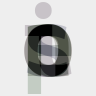

In [40]:
reduce(ims, "b h w c -> h w c", "mean")

In [44]:
reduce(ims, "b h w c -> b h w", "mean")

TypeError: Cannot handle this data type: (1, 1, 96), |u1

In [47]:
# this is mean-pooling with 2x2 kernel
# image is split into 2x2 patches, each patch is averaged
reduce(ims, "b (h h2) (w w2) c -> h (b w) c", "mean", h2=2, w2=2).shape

(48, 288, 3)

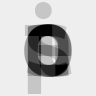

In [50]:
reduce(ims, "(b1 b2) h w c -> h w", "mean", b1=3)


In [1]:
import numpy as np

array_4d = np.random.randint(-2, 3, size=(1, 2, 3, 2))

In [5]:
array_4d

array([[[[-1,  1],
         [-2,  2],
         [ 1,  1]],

        [[ 0, -1],
         [ 1,  2],
         [ 1, -1]]]])

In [31]:
rearrange(array_4d, )

array([[-1, -2]])

In [38]:
x=np.array([[1,2,3], [4,5,6]])
np.stack(x, axis=1)



array([[1, 4],
       [2, 5],
       [3, 6]])

In [35]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [56]:
rearrange(ims, "b h w c -> h w c b")

<array of shape (96, 96, 3, 6)>


In [1]:
import torch
from einops import rearrange, einsum

In [3]:

x = torch.randn(1, 1, 3, 4)
y = torch.randn(3, 4)





In [4]:
x

tensor([[[[-1.5857, -0.4947, -1.8434,  0.1932],
          [-0.1086, -0.4346, -0.1762,  0.6385],
          [-1.2858, -0.3116, -1.1292,  0.2785]]]])

In [5]:
y

tensor([[-0.1305, -0.0703, -2.0743,  1.0949],
        [-0.6838, -0.8115,  1.9296, -0.9654],
        [-0.4967,  1.1487, -0.7391,  1.1523]])

In [7]:
x@y.T

tensor([[[[ 4.2770, -2.2578,  1.8046],
          [ 1.1094, -0.5295,  0.4207],
          [ 2.8370, -1.3158,  1.4363]]]])

In [8]:
import torch

A = torch.randn(8, 2, 4, 5)
B = torch.randn(7, 1, 5, 6)
C = A @ B
print(C.shape)   # torch.Size([7, 8, 2, 4, 6])

RuntimeError: The size of tensor a (8) must match the size of tensor b (7) at non-singleton dimension 0

In [39]:
import torch
from einops import rearrange, einsum
## Basic implementation
D = torch.randint(0, 10, (2, 2, 3))
A = torch.randint(0, 10, (2, 3))

D
# Hard to tell the input and output shapes and what they mean.
# What shapes can D and A have, and do any of these have unexpected behavior?
## Einsum is self-documenting and robust
# # D A -> Y
# Y1 = einsum(D, A, "batch sequence d_in, d_out d_in -> batch sequence d_out")
# Y1
# ## Or, a batched version where D can have any leading dimensions but A is constrained.
# Y = einsum(D, A, "... d_in, d_out d_in -> ... d_out")

tensor([[[9, 8, 7],
         [7, 4, 8]],

        [[6, 0, 4],
         [5, 0, 5]]])

In [40]:
A

tensor([[7, 2, 6],
        [6, 9, 3]])

In [41]:
D@A.T

tensor([[[121, 147],
         [105, 102]],

        [[ 66,  48],
         [ 65,  45]]])

In [42]:

Y1 = einsum(D, A, "batch sequence d_in, d_out d_in -> batch sequence d_out")
Y1

tensor([[[121, 147],
         [105, 102]],

        [[ 66,  48],
         [ 65,  45]]])

In [28]:
A = torch.randn(2, 3, 3)
A
# c = torch.einsum("ii->", A)  # Scalar (trace)

tensor([[[ 0.1687, -1.7397,  0.5455],
         [ 1.2178, -0.5214, -2.4038],
         [ 3.0815, -0.3591,  0.7045]],

        [[-0.4907,  0.4289, -1.6393],
         [-0.3293,  0.0351, -0.6056],
         [ 0.1741,  1.0898, -1.6072]]])

In [29]:
torch.einsum("bii->b", A)


tensor([ 0.3517, -2.0628])

In [27]:
torch.einsum("ij->", A) - torch.einsum("ii->", A)


tensor(2.8492)

In [43]:
D = torch.randint(0, 10, (2, 2, 3))
A = torch.randint(0, 10, (2, 3))

# einsum style (using explicit subscripts)
Y1 = torch.einsum('bsd,od->bso', D, A)

# matmul, matching axes (note: A.T shape is (3, 2))
Y2 = torch.matmul(D, A.T)  # D: (2, 2, 3), A.T: (3, 2) --> (2, 2, 2)

print(torch.allclose(Y1, Y2))  # should be True

True


In [55]:
images = torch.randn(64, 128, 128, 3) # (batch, height, width, channel)
dim_by = torch.linspace(start=0.0, end=1.0, steps=10)
dim_by


tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])

In [59]:
dim_value = rearrange(dim_by, "dim_value -> 1 dim_value 1 1 1")
dim_value.shape

torch.Size([1, 10, 1, 1, 1])

In [57]:

images_rearr = rearrange(images, "b height width channel -> b 1 height width channel")
images_rearr.shape

torch.Size([64, 1, 128, 128, 3])

In [62]:
dimmed_images = images_rearr * dim_value
dimmed_images.shape

torch.Size([64, 10, 128, 128, 3])

In [4]:
import torch
channels_last = torch.randn(64, 32, 32, 3) # (batch, height, width, channel)
B = torch.randn(32*32, 32*32) # (1024, 1024)

In [25]:
## Rearrange an image tensor for mixing across all pixels
channels_last_flat = channels_last.view(-1, channels_last.size(1) * channels_last.size(2), channels_last.size(3))
channels_first_flat = channels_last_flat.transpose(1, 2) # shape (64, 3, 1024)
channels_first_flat_transformed = channels_first_flat @ B.T # shape (64, 3, 1024) * (1024, 1024) = (64, 3, 1024)
channels_last_flat_transformed = channels_first_flat_transformed.transpose(1, 2) # shape (64, 1024, 3)
channels_last_transformed = channels_last_flat_transformed.view(*channels_last.shape)
channels_last_transformed.shape


torch.Size([64, 32, 32, 3])

In [30]:
from einops import rearrange, einsum

In [33]:
channel_first_flat = rearrange(
    channels_last,
    "batch height width channel -> batch channel (height width)"
)

channels_first_flat_transformed = einsum(
    channel_first_flat, B,
    "batch channel pixel_in, pixel_out pixel_in -> batch channel pixel_out",
)

channels_last_transformed = rearrange(
    channels_first_flat_transformed,
    "batch channel (height width) -> batch height width channel",
    height = 32,
    width = 32
)

In [35]:
channels_last_transformed.shape

torch.Size([64, 32, 32, 3])

In [ ]:
import torch
from torch import nn
from einops import einsum

def get_std(
    in_feature: int,
    out_feature: int
):
    return torch.sqrt(2/(in_feature + out_feature))

class Linear(nn.Module):
    def __init__(
            self,
            in_features: int,
            out_features: int,
            device: torch.device=None,
            dtype: torch.device=None
    ):
        super().__init__()
        factory_kwargs = {"device": device, "dtype": dtype}
        self.W = nn.Parameter(out_features, in_features, **factory_kwargs)
        std = get_std(in_features, out_features)
        self.W = nn.init.trunc_normal_(self.W, mean = 0, std=std, a=-3*std, b=3*std)

    
    def forward(self, x: torch.tensor):
        return einsum(x, self.W,  "batch in_feature, out_feature in_feature-> batch out_feature")


    

In [31]:
ll = Linear(2, 3)
x = torch.one(5, 1)

TypeError: descriptor '__init__' of 'super' object needs an argument